### Transfer Learning by fine-tuning a BERT-based model on a specific text classification task

### Emotion Detection (100k)

### Exploratory Data Analysis 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
print("Load Dataset")
df = pd.read_csv("hf://datasets/shreyaspullehf/emotion_dataset_100k/emotion_dataset_100k.csv")
df.to_csv("emotion_dataset_100k")

Load Dataset


c:\Users\Adminstrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("emotion_dataset_100k")
df

,Unnamed: 0,sentence,emotion
0,0,"Ugh, how can something that's been sitting out...",disgust
1,1,"Ugh, get it off me, get it away from me, what ...",disgust
2,2,The thought of eating that congealed leftover ...,disgust
3,3,A sour taste spreads through my mouth like a s...,disgust
4,4,It felt like someone had dumped a bucket of ro...,disgust
...,...,...,...
99741,99741,"As she stumbled upon the hidden garden, a riot...",surprise
99742,99742,"As I stepped into the forgotten courtyard, a m...",surprise
99743,99743,Her eyes snapped open like the sudden release ...,surprise
99744,99744,My eyes popped wide like bubbles bursting on t...,surprise


In [5]:
print("Data inspection ")

print("\nDescribe : \n", df.describe())
print("\nShape : \n", df.shape)
print("\nInfo : \n", df.info())
print("\nColumns: \n", df.columns)
print("\nDtypes : \n", df.dtypes)

Data inspection 

Describe : 
          Unnamed: 0
count  99746.000000
mean   49872.500000
std    28794.334312
min        0.000000
25%    24936.250000
50%    49872.500000
75%    74808.750000
max    99745.000000

Shape : 
 (99746, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99746 entries, 0 to 99745
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99746 non-null  int64 
 1   sentence    99746 non-null  object
 2   emotion     99746 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB

Info : 
 None

Columns: 
 Index(['Unnamed: 0', 'sentence', 'emotion'], dtype='object')

Dtypes : 
 Unnamed: 0     int64
sentence      object
emotion       object
dtype: object


In [6]:
print("Descriptive Statistics ")
df.value_counts()

Descriptive Statistics 


Unnamed: 0  sentence                                                                                                                                                                                                                                                                                                                     emotion   
0           Ugh, how can something that's been sitting out for this long still be considered edible?                                                                                                                                                                                                                                     disgust       1
66481       As she walked through the crowded city square, her solitude stood out like a transparent figurine on a shelf of intricately carved wooden dolls, each one paired and nestled together in joyful companionship.                                                                                                 

In [7]:
print("Data quality \n")

print("checking for null")
print(df.isnull().sum())


print("\nchecking for duplicates")
print(df.duplicated().sum())

Data quality 

checking for null
Unnamed: 0    0
sentence      0
emotion       0
dtype: int64

checking for duplicates
0


In [7]:
df.groupby('emotion').describe()

Unnamed: 0                                                    \
                   count     mean          std      min       25%      50%   
emotion                                                                      
disgust           9975.0   4987.0  2879.678802      0.0   2493.50   4987.0   
drive             9996.0  14972.5  2885.740979   9975.0  12473.75  14972.5   
embarrassment     9969.0  24955.0  2877.946751  19971.0  22463.00  24955.0   
excitement        9947.0  34913.0  2871.595898  29940.0  32426.50  34913.0   
fear              9978.0  44875.5  2880.544827  39887.0  42381.25  44875.5   
happiness         9995.0  54862.0  2885.452304  49865.0  52363.50  54862.0   
loneliness        9992.0  64855.5  2884.586279  59860.0  62357.75  64855.5   
love              9980.0  74841.5  2881.122177  69852.0  72346.75  74841.5   
sadness           9989.0  84826.0  2883.720253  79832.0  82329.00  84826.0   
surprise          9925.0  94783.0  2865.245045  89821.0  92302.00  94783.0   

                                  
                    75%      max  
emotion                           
disgust         7480.50   9974.0  
drive          17471.25  19970.0  
embarrassment  27447.00  29939.0  
excitement     37399.50  39886.0  
fear           47369.75  49864.0  
happiness      57360.50  59859.0  
loneliness     67353.25  69851.0  
love           77336.25  79831.0  
sadness        87323.00  89820.0  
surprise       97264.00  99745.0

In [8]:
print("Value Count of Each Emotion \n")

counts = df['emotion'].value_counts()
Count_df = counts.reset_index(name = 'count')
print(Count_df)

Value Count of Each Emotion 

         emotion  count
0          drive   9996
1      happiness   9995
2     loneliness   9992
3        sadness   9989
4           love   9980
5           fear   9978
6        disgust   9975
7  embarrassment   9969
8     excitement   9947
9       surprise   9925


Plotting the distribution


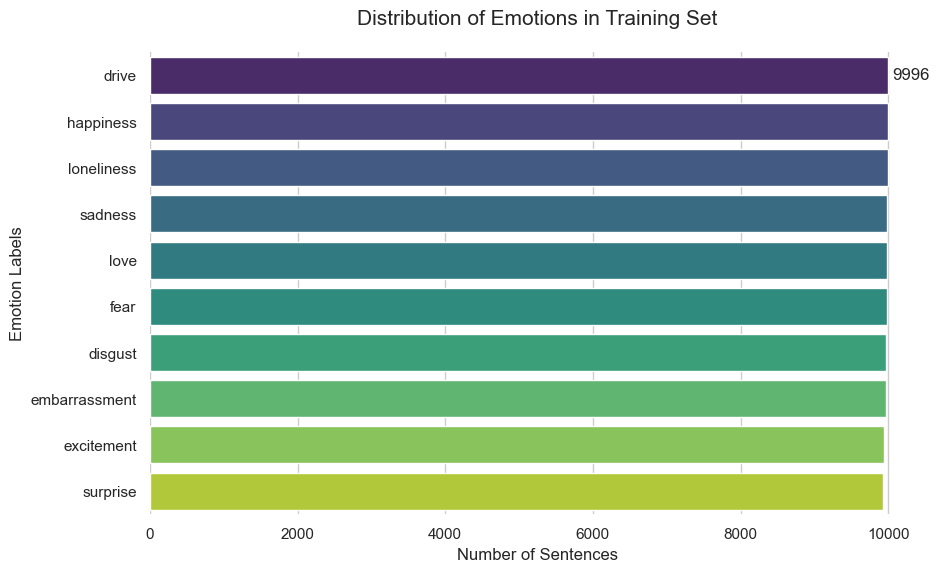

In [9]:
print("Plotting the distribution")

sns.set_theme(style = "whitegrid")
plt.figure(figsize = (10,6))

ax = sns.barplot(data = Count_df , y='emotion', x='count' , palette='viridis', hue='emotion', legend =False)
ax.bar_label(ax.containers[0], padding=3)

plt.title('Distribution of Emotions in Training Set', fontsize=15, pad=20)
plt.xlabel('Number of Sentences', fontsize=12)
plt.ylabel('Emotion Labels', fontsize=12)
sns.despine(left=True, bottom=True)

plt.show()

#### Encoding Emotions 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Emotion_Labelled'] = le.fit_transform(df['emotion'])
df


,Unnamed: 0,sentence,emotion,Emotion_Labelled
0,0,"Ugh, how can something that's been sitting out...",disgust,0
1,1,"Ugh, get it off me, get it away from me, what ...",disgust,0
2,2,The thought of eating that congealed leftover ...,disgust,0
3,3,A sour taste spreads through my mouth like a s...,disgust,0
4,4,It felt like someone had dumped a bucket of ro...,disgust,0
...,...,...,...,...
99741,99741,"As she stumbled upon the hidden garden, a riot...",surprise,9
99742,99742,"As I stepped into the forgotten courtyard, a m...",surprise,9
99743,99743,Her eyes snapped open like the sudden release ...,surprise,9
99744,99744,My eyes popped wide like bubbles bursting on t...,surprise,9


In [10]:
from sklearn.model_selection import train_test_split


X = df['sentence']
y = df['Emotion_Labelled']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Train size: {X_train.shape[0]}")
print(f"Val size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


Train size: 69822
Val size: 14962
Test size: 14962


### Model Creation Training and Finetuning 


#### Setting up model

In [11]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW # The standard optimizer for BERT
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset # To load your emotion dataset

#### Testing embeddings with bert

In [12]:
from transformers import BertTokenizer,BertForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=10)
model.to(device)



def get_sentence_embedding(sentences):    
    tokens = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.bert(**tokens)
    return outputs.pooler_output


embeddings = get_sentence_embedding([
    "Ugh, how can something that's been sitting out for this long still be considered edible?", 
    "As I gaze into their eyes, warmth spreads through my chest like sunlight unfurling through frost-kissed leaves."
])

print(f"Embeddings shape: {embeddings.shape}")
print(embeddings)


Using device: cuda


Loading weights: 100%|██████████| 199/199 [00:00<00:00, 973.98it/s, Materializing param=bert.pooler.dense.weight]                               
BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those pa

Embeddings shape: torch.Size([2, 768])
tensor([[-0.8995, -0.3143, -0.8159,  ..., -0.7976, -0.6193,  0.9293],
        [-0.9079, -0.4385, -0.9126,  ..., -0.7714, -0.7402,  0.8715]],
       device='cuda:0')


#### Converting data for bert to understand


In [13]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts.tolist() if hasattr(texts, 'tolist') else texts
        self.labels = labels.tolist() if hasattr(labels, 'tolist') else labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[item], dtype=torch.long)
        }


#### Model Architecture

In [14]:
from transformers import BertModel

class EmotionClassifier(nn.Module):
    def __init__(self, n_classes):
        super(EmotionClassifier , self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # dropout fot overfitting
        self.dropout = nn.Dropout(p=0.1)
        # BERT base outputs a vector of 768, we map it to 10 classes
        self.output_layer = nn.Linear(self.bert.config.hidden_size , n_classes)

    def forward(self, input_ids , attention_mask):
        outputs = self.bert(
            input_ids = input_ids,
            attention_mask = attention_mask
        )
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.output_layer(x)
        
        return logits


#### Model Metrics 

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_metrics(preds, labels):
    preds = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='weighted'
    )
    acc = accuracy_score(labels, preds)
    
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall 
    }


#### data loader to handle large dataset

In [16]:

def create_data_loader(X, y, tokenizer, max_len, batch_size):
    ds = EmotionDataset(
        texts=X,
        labels=y,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(ds, batch_size=batch_size , num_workers = 0 , pin_memory = True , shuffle = True)

# Set your constants
MAX_LEN = 128
BATCH_SIZE = 32 # BERT works best with 16 or 32

train_dataloader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_dataloader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_dataloader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE)

#### Model Training and Fine-Tuning 

In [18]:
from tqdm.auto import tqdm
from torch.cuda.amp import GradScaler, autocast

EPOCHS = 3
LEARNING_RATE = 2e-5 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EmotionClassifier(n_classes = 10).to(device)
optimizer = AdamW(model.parameters(), lr = LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss().to(device) 

scaler = GradScaler()

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    model.train()
    
    # 2. Add Progress Bar
    progress_bar = tqdm(train_dataloader, desc="Training")
    total_loss = 0

    for batch in progress_bar:
        optimizer.zero_grad()
        
        ids = batch['input_ids'].to(device, non_blocking=True)
        mask = batch['attention_mask'].to(device, non_blocking=True)
        labels = batch['labels'].to(device, non_blocking=True)
        
        # 3. Use Autocast for Forward Pass
        with autocast():
            outputs = model(ids, mask)
            loss = loss_fn(outputs, labels)
        
        # 4. Use Scaler for Backward Pass
        scaler.scale(loss).backward()
        
        # Gradient Clipping (inside scaler)
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        scaler.step(optimizer)
        scaler.update()
        
        total_loss += loss.item()
        
        # Update progress bar with live loss
        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Average Training Loss: {avg_train_loss:.4f}')

    
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask)
        all_preds.append(outputs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())


val_metrics = calculate_metrics(np.concatenate(all_preds), np.concatenate(all_labels))
print(f"Val Accuracy: {val_metrics['accuracy']:.4f} | F1: {val_metrics['f1']:.4f}")



Loading weights: 100%|██████████| 199/199 [00:00<00:00, 1061.38it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
C:\Users\Adminstrator\AppData\Local\Temp\ipykernel_36928\2550133198.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is depr

Epoch 1/3


Training:   0%|          | 0/2182 [00:00<?, ?it/s]C:\Users\Adminstrator\AppData\Local\Temp\ipykernel_36928\2550133198.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training: 100%|██████████| 2182/2182 [08:13<00:00,  4.42it/s, loss=0.2773]


Average Training Loss: 0.2873
Epoch 2/3


Training: 100%|██████████| 2182/2182 [08:08<00:00,  4.47it/s, loss=0.0696]


Average Training Loss: 0.1042
Epoch 3/3


Training: 100%|██████████| 2182/2182 [08:07<00:00,  4.47it/s, loss=0.0456]


Average Training Loss: 0.0607
Val Accuracy: 0.9540 | F1: 0.9542


#### Confusion Matrix

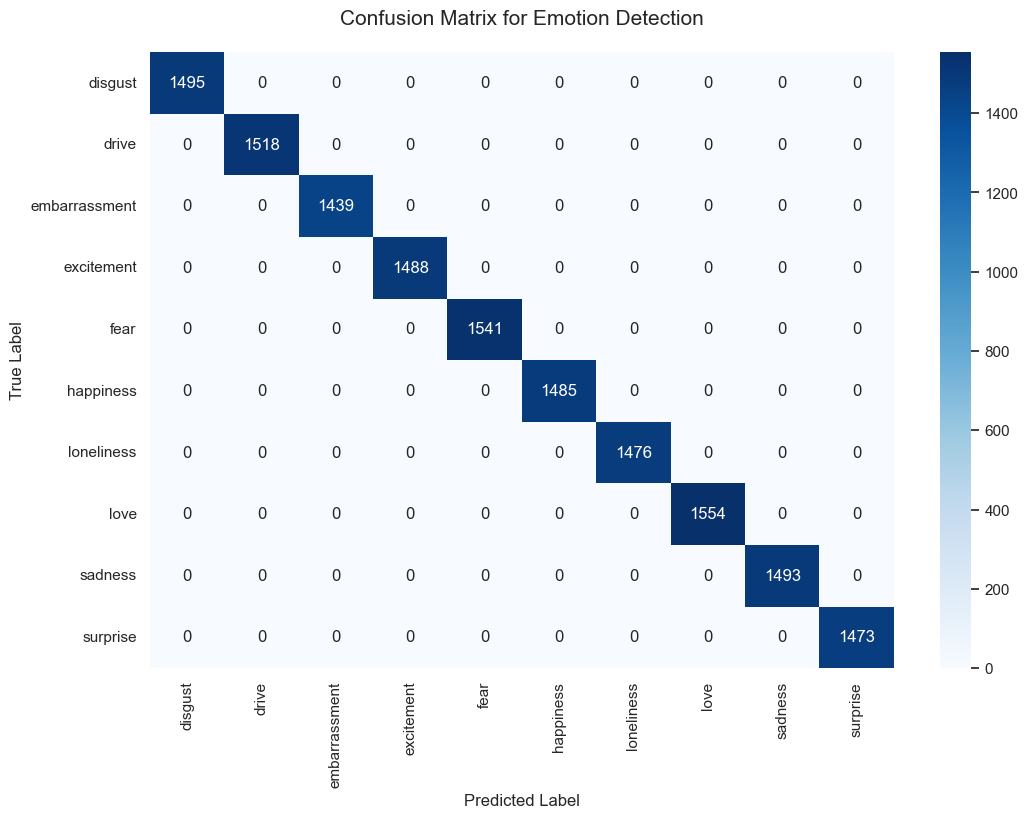

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in test_dataloader:
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(ids, mask)
        _, preds = torch.max(outputs, dim =1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true , y_pred)
emotion_labels = le.classes_

plt.figure(figsize = (12, 8))
sns.heatmap(cm , annot = True , fmt ='d', cmap='Blues',
            xticklabels = emotion_labels,
            yticklabels = emotion_labels)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix for Emotion Detection', fontsize=15, pad=20)
plt.show()


#### performance metrics for each class

In [23]:
import numpy as np
from sklearn.metrics import classification_report

# 1. Get test set predictions
model.eval()
all_test_preds = []
all_test_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(ids, mask)
        all_test_preds.append(outputs.cpu().numpy())
        all_test_labels.append(labels.cpu().numpy())

# 2. Flatten and convert to classes
y_pred = np.argmax(np.concatenate(all_test_preds), axis=1)
y_true = np.concatenate(all_test_labels)

# 3. Print the final Classification Report
print("Final Test Set Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

Final Test Set Report:
               precision    recall  f1-score   support

      disgust       0.99      0.96      0.98      1495
        drive       0.96      0.96      0.96      1518
embarrassment       1.00      0.96      0.98      1439
   excitement       0.96      0.96      0.96      1488
         fear       0.95      0.98      0.96      1541
    happiness       0.97      0.97      0.97      1485
   loneliness       0.97      0.88      0.92      1476
         love       0.99      0.97      0.98      1554
      sadness       0.85      0.96      0.90      1493
     surprise       0.92      0.94      0.93      1473

     accuracy                           0.95     14962
    macro avg       0.96      0.95      0.95     14962
 weighted avg       0.96      0.95      0.95     14962



#### saving the model

In [24]:
import torch

# Define your file path
MODEL_PATH = "emotion_detector_v1.pt"

# Create a checkpoint dictionary
checkpoint = {
    'model_state_dict': model.state_dict(),
    'label_encoder': le,       # Saves your emotion name mappings
    'tokenizer_name': 'bert-base-uncased',
    'final_val_accuracy': 0.9540
}

# Save the file
torch.save(checkpoint, MODEL_PATH)
print(f"Model successfully saved to {MODEL_PATH}")

Model successfully saved to emotion_detector_v1.pt


### with any input , prediction and confidence score

In [18]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
import torch.nn.functional as F

# 1. Setup Device and Tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 2. Re-initialize the Architecture
# (Make sure the class definition for EmotionClassifier is in your notebook)
model = EmotionClassifier(n_classes=10)

# 3. Load from the Saved File
checkpoint = torch.load('emotion_detector_v1.pt', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
le = checkpoint['label_encoder'] # Restores your emotion name mappings

model.to(device)
model.eval()

print(" Model weights and LabelEncoder restored from file.")

# 4. Prediction Function
def predict_emotion(sentence):
    inputs = tokenizer(
        sentence, 
        return_tensors="pt", 
        padding=True, 
        truncation=True, 
        max_length=128
    ).to(device)
    
    with torch.no_grad():
        logits = model(inputs['input_ids'], inputs['attention_mask'])
    
    probs = F.softmax(logits, dim=1)
    conf, pred_idx = torch.max(probs, dim=1)
    
    label = le.inverse_transform([pred_idx.item()])[0]
    return label, conf.item() * 100

# 5. Command Line Interface
print("\n--- BERT Emotion Detector (Type 'exit' to quit) ---")
while True:
    user_input = input("Enter a sentence: ")
    if user_input.lower() == 'exit':
        break
    if not user_input.strip():
        continue

    emotion, score = predict_emotion(user_input)
    print(f"Result: {emotion} ({score:.2f}%)")

Loading weights: 100%|██████████| 199/199 [00:00<00:00, 1121.05it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
C:\Users\Adminstrator\AppData\Local\Temp\ipykernel_20576\1537162128.py:15: FutureWarning: You are using `torch.load` with `weights_onl

✅ Model weights and LabelEncoder restored from file.

--- BERT Emotion Detector (Type 'exit' to quit) ---
Result: happiness (99.98%)
Result: fear (47.34%)
Result: love (89.19%)
